In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 7

In [56]:
#funzioni utilizzate

#implementazione del calcolo della funzione di autocorrelazione dato un array di misure mis e un tempo t
def AutoCorr(mis, t):
    t_max=len(mis)
    #sommatorie della formula nell'ordine in cui compaiono, con già la normalizzazione
    sum1=np.mean(mis[:t_max-t]*mis[t:t_max])
    sum2=np.mean(mis[:(t_max-t)])
    sum3=np.mean(mis[t:t_max])
    sum4=np.mean(mis*mis)
    sum5=np.mean(mis)
    return (sum1-(sum2*sum3))/(sum4-(sum5**2))

#errore a blocchi larghi L passi su un array di dati mis, ritorna media e errore all'ultimo blocco
def BlockAnalysis(mis, L):
    if L==0:
        raise ValueError("Errore: la larghezza dei blocchi non può essere zero.")
    B=len(mis)//L  #numero di blocchi
    if len(mis)%B != 0:
        raise ValueError("Attenzione: il numero di blocchi inserito non è divisore del numero di lanci totale.")
    mis_blocks=np.reshape(mis[:B*L], (B, L))  #creo B vettori da L elementi
    #medie per ogni blocco
    mean_block=np.mean(mis_blocks, axis=1)
    mean_block2=mean_block*mean_block
    #medie considerando tutti i blocchi
    mean_tot=np.sum(mean_block)/B
    mean_tot2=np.sum(mean_block2)/B
    #errore all'ultimo blocco
    fin_error=np.sqrt((mean_tot2 - mean_tot**2)/B)
    return fin_error   

In [61]:
#variabili utilizzate

Neq=600  #passi della simulazione di equilibrazione
xeq=np.arange(Neq)  #plotto in base agli steps, non faccio media a blocchi
gNeq=1000  #passi della simulazione di equilibrazione del gas (ha bisogno di più tempo)
gxeq=np.arange(gNeq)
Nan=500000  #passi della simulazione di analisi
xan=np.arange(Nan)  #plotto in base agli steps, non faccio media a blocchi
Ls=np.array([x for x in range(10,10001) if (Nan%x ==0)]) #divisori di 500000 che uso come larghezza dei blocchi
ts=xan[:800]  #valori di t per cui valuto autocorrelazione di solidi e liquidi
gts=xan[:10000]  #t autocorrelazione gas

## Stato solido 

In [4]:
sol_eq=np.loadtxt("SolidState/eq_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
sol_inst=np.loadtxt("SolidState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

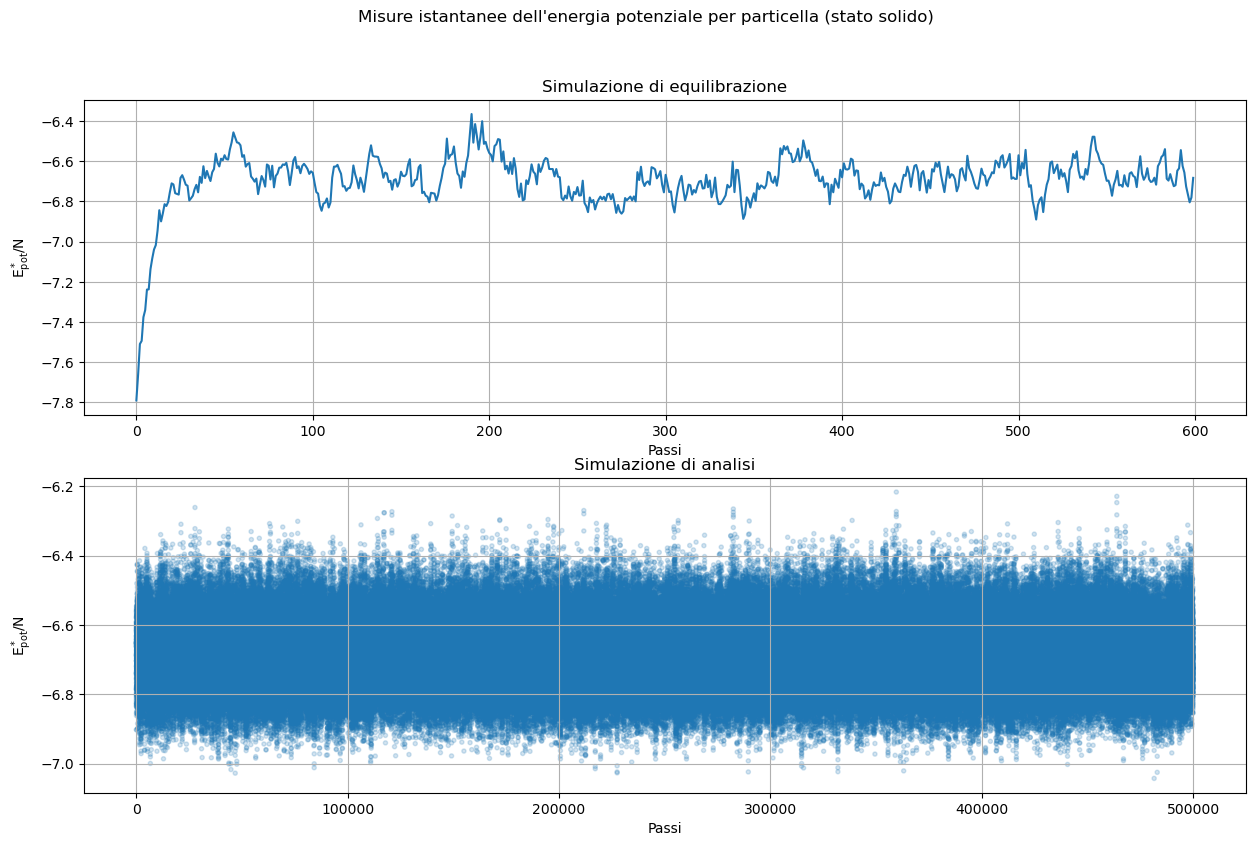

In [5]:
sfig ,(splt1, splt2) = plt.subplots(2, 1, figsize=(15, 9))

splt1.plot(xeq, sol_eq)
splt1.set_xlabel("Passi")
splt1.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
splt1.set_title("Simulazione di equilibrazione")
splt1.grid(True)

splt2.scatter(xan, sol_inst, marker='.', linestyle='', alpha=0.2)
splt2.set_xlabel("Passi")
splt2.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
splt2.set_title("Simulazione di analisi")
splt2.grid(True)

sfig.suptitle("Misure istantanee dell'energia potenziale per particella (stato solido)")
plt.show()

In [6]:
sol_ac=np.empty(len(ts))
for i in range(len(ts)):
    sol_ac[i]=AutoCorr(sol_inst, ts[i])

In [47]:
sol_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    sol_error[i]=BlockAnalysis(sol_inst, Ls[i])

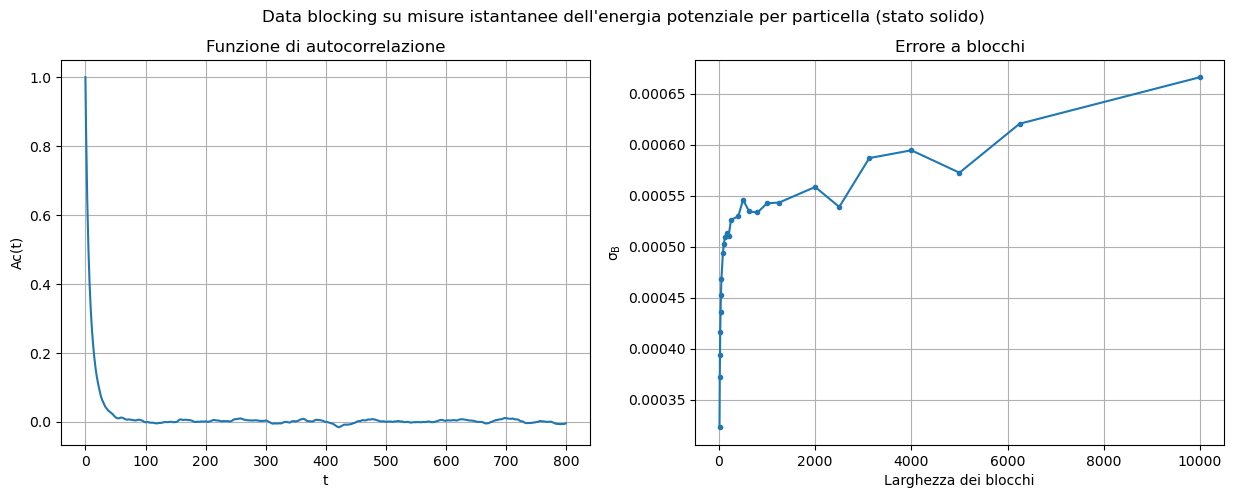

In [48]:
sbfig ,(sbplt1, sbplt2) = plt.subplots(1, 2, figsize=(15, 5))

sbplt1.plot(ts, sol_ac)
sbplt1.set_xlabel("t")
sbplt1.set_ylabel("Ac(t)")
sbplt1.set_title("Funzione di autocorrelazione")
sbplt1.grid(True)

sbplt2.plot(Ls, sol_error, marker='.')
sbplt2.set_xlabel("Larghezza dei blocchi")
sbplt2.set_ylabel(r"$\mathrm{\sigma_B}$")
sbplt2.set_title("Errore a blocchi")
sbplt2.grid(True)

sbfig.suptitle("Data blocking su misure istantanee dell'energia potenziale per particella (stato solido)")
plt.show()

In [9]:
#L'errore a blocchi dovrebbe stabilizzarsi (vero?) e invece continua a crescere, non capisco perchè, ho anche provato a usare la funzione definita dal prof nella Es1 e resta così l'andamento

## Stato liquido

In [10]:
liq_eq=np.loadtxt("LiquidState/eq_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
liq_inst=np.loadtxt("LiquidState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

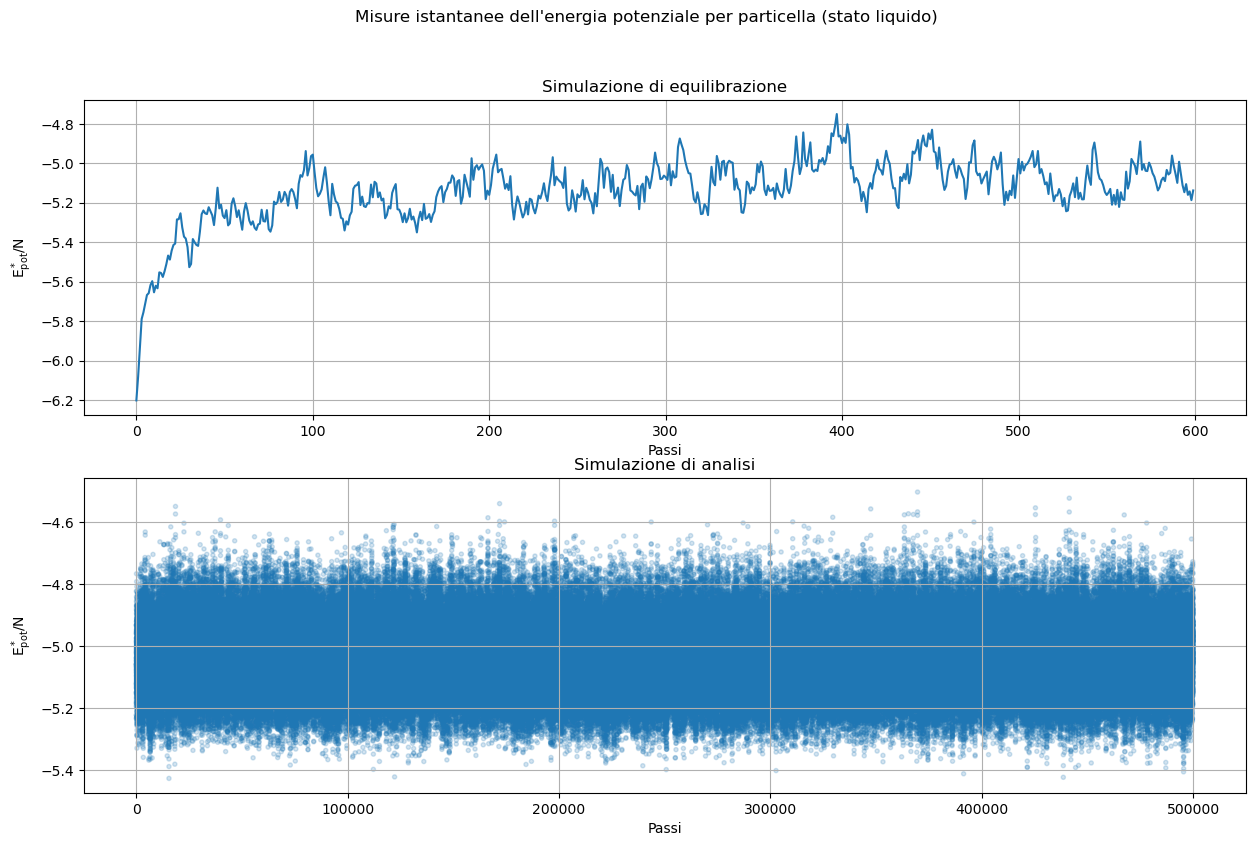

In [11]:
lfig ,(lplt1, lplt2) = plt.subplots(2, 1, figsize=(15, 9))

lplt1.plot(xeq, liq_eq)
lplt1.set_xlabel("Passi")
lplt1.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
lplt1.set_title("Simulazione di equilibrazione")
lplt1.grid(True)

lplt2.scatter(xan, liq_inst, marker='.', linestyle='', alpha=0.2)
lplt2.set_xlabel("Passi")
lplt2.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
lplt2.set_title("Simulazione di analisi")
lplt2.grid(True)

lfig.suptitle("Misure istantanee dell'energia potenziale per particella (stato liquido)")
plt.show()

In [12]:
liq_ac=np.empty(len(ts))
for i in range(len(ts)):
    liq_ac[i]=AutoCorr(liq_inst, ts[i])

In [13]:
liq_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    liq_error[i]=BlockAnalysis(liq_inst, Ls[i])

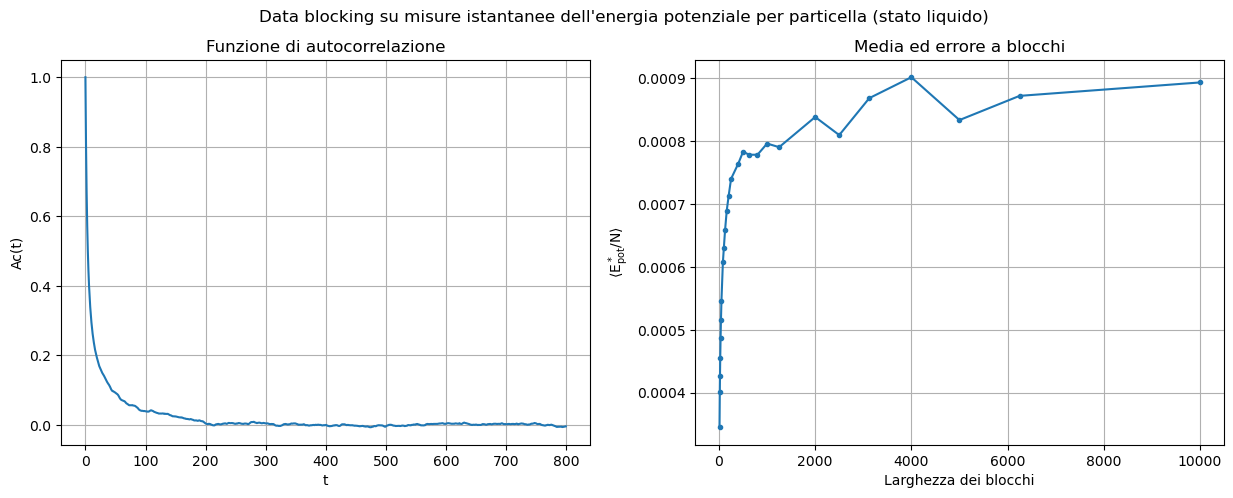

In [14]:
lbfig ,(lbplt1, lbplt2) = plt.subplots(1, 2, figsize=(15, 5))

lbplt1.plot(ts, liq_ac)
lbplt1.set_xlabel("t")
lbplt1.set_ylabel("Ac(t)")
lbplt1.set_title("Funzione di autocorrelazione")
lbplt1.grid(True)

lbplt2.plot(Ls, liq_error, marker='.')
lbplt2.set_xlabel("Larghezza dei blocchi")
lbplt2.set_ylabel(r"$\langle \mathrm{E_{pot}^*/N} \rangle$")
lbplt2.set_title("Media ed errore a blocchi")
lbplt2.grid(True)

lbfig.suptitle("Data blocking su misure istantanee dell'energia potenziale per particella (stato liquido)")
plt.show()

## Stato gassoso

In [50]:
gas_eq=np.loadtxt("GasState/eq_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gas_inst=np.loadtxt("GasState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

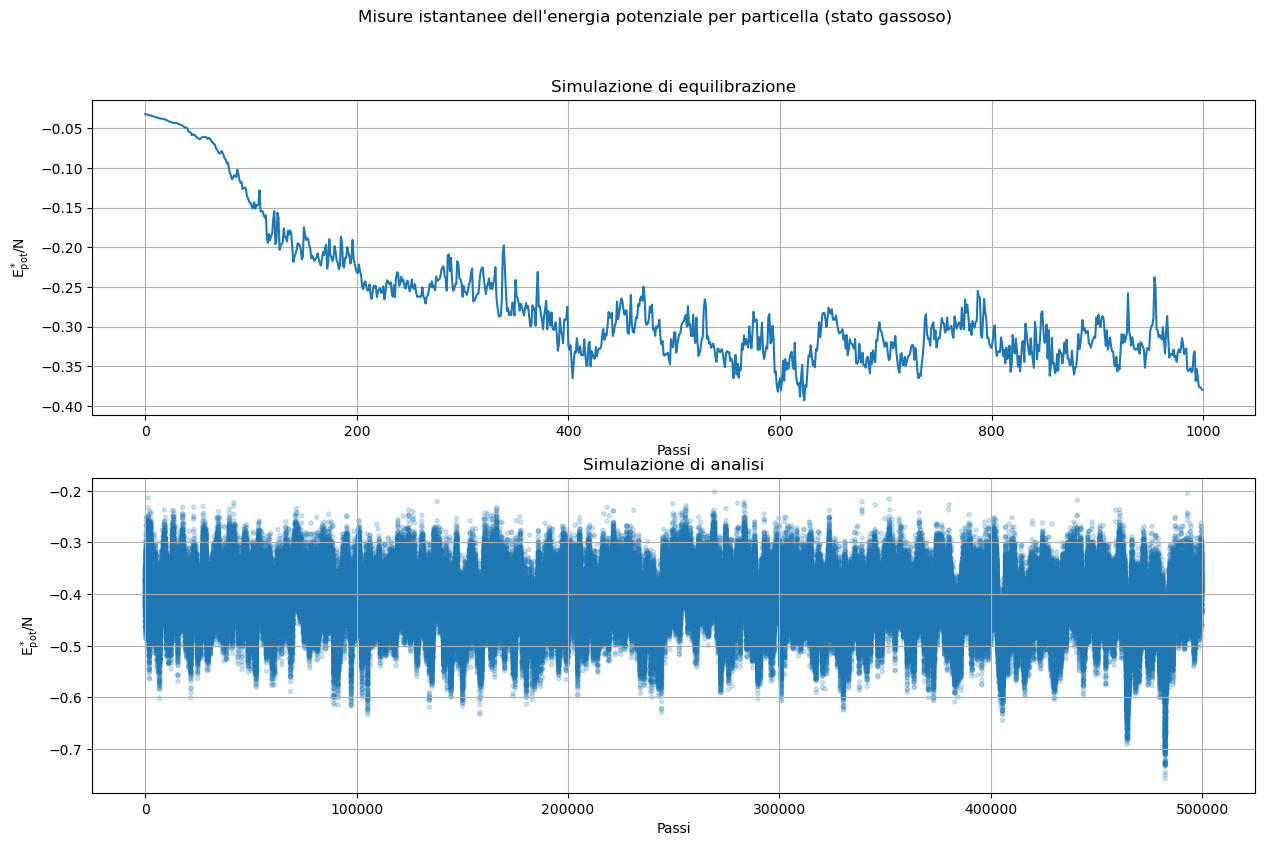

In [51]:
gfig ,(gplt1, gplt2) = plt.subplots(2, 1, figsize=(15, 9))

gplt1.plot(gxeq, gas_eq)
gplt1.set_xlabel("Passi")
gplt1.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
gplt1.set_title("Simulazione di equilibrazione")
gplt1.grid(True)

gplt2.scatter(xan, gas_inst, marker='.', linestyle='', alpha=0.2)
gplt2.set_xlabel("Passi")
gplt2.set_ylabel(r"$\mathrm{E_{pot}^*/N}$")
gplt2.set_title("Simulazione di analisi")
gplt2.grid(True)

gfig.suptitle("Misure istantanee dell'energia potenziale per particella (stato gassoso)")
plt.show()

In [62]:
gas_ac=np.empty(len(gts))
for i in range(len(gts)):
    gas_ac[i]=AutoCorr(gas_inst, gts[i])

In [59]:
gas_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    gas_error[i]=BlockAnalysis(gas_inst, Ls[i])

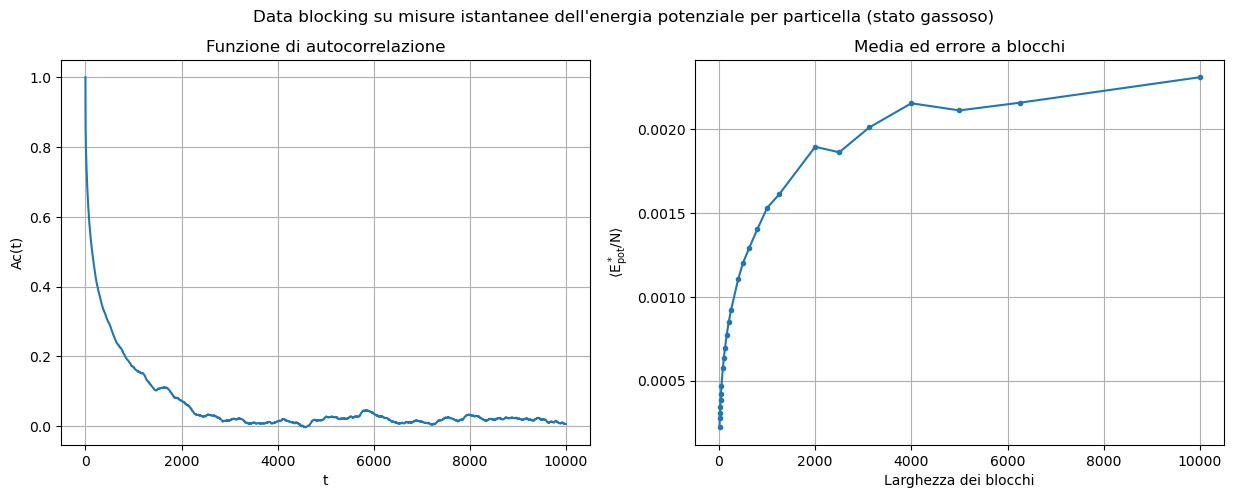

In [63]:
gbfig ,(gbplt1, gbplt2) = plt.subplots(1, 2, figsize=(15, 5))

gbplt1.plot(gts, gas_ac)
gbplt1.set_xlabel("t")
gbplt1.set_ylabel("Ac(t)")
gbplt1.set_title("Funzione di autocorrelazione")
gbplt1.grid(True)

gbplt2.plot(Ls, gas_error, marker='.')
gbplt2.set_xlabel("Larghezza dei blocchi")
gbplt2.set_ylabel(r"$\langle \mathrm{E_{pot}^*/N} \rangle$")
gbplt2.set_title("Media ed errore a blocchi")
gbplt2.grid(True)

gbfig.suptitle("Data blocking su misure istantanee dell'energia potenziale per particella (stato gassoso)")
plt.show()

Non mi convincono molto questi grafici sinceramente